<h2><a href="https://leetcode.com/problems/number-of-closed-islands">1254. Number of Closed Islands</a></h2><h3>Medium</h3><hr><p>Given a 2D&nbsp;<code>grid</code> consists of <code>0s</code> (land)&nbsp;and <code>1s</code> (water).&nbsp; An <em>island</em> is a maximal 4-directionally connected group of <code><font face="monospace">0</font>s</code> and a <em>closed island</em>&nbsp;is an island <strong>totally</strong>&nbsp;(all left, top, right, bottom) surrounded by <code>1s.</code></p>

<p>Return the number of <em>closed islands</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<p><img alt="" src="https://assets.leetcode.com/uploads/2019/10/31/sample_3_1610.png" style="width: 240px; height: 120px;" /></p>

<pre>
<strong>Input:</strong> grid = [[1,1,1,1,1,1,1,0],[1,0,0,0,0,1,1,0],[1,0,1,0,1,1,1,0],[1,0,0,0,0,1,0,1],[1,1,1,1,1,1,1,0]]
<strong>Output:</strong> 2
<strong>Explanation:</strong> 
Islands in gray are closed because they are completely surrounded by water (group of 1s).</pre>

<p><strong class="example">Example 2:</strong></p>

<p><img alt="" src="https://assets.leetcode.com/uploads/2019/10/31/sample_4_1610.png" style="width: 160px; height: 80px;" /></p>

<pre>
<strong>Input:</strong> grid = [[0,0,1,0,0],[0,1,0,1,0],[0,1,1,1,0]]
<strong>Output:</strong> 1
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> grid = [[1,1,1,1,1,1,1],
&nbsp;              [1,0,0,0,0,0,1],
&nbsp;              [1,0,1,1,1,0,1],
&nbsp;              [1,0,1,0,1,0,1],
&nbsp;              [1,0,1,1,1,0,1],
&nbsp;              [1,0,0,0,0,0,1],
               [1,1,1,1,1,1,1]]
<strong>Output:</strong> 2
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= grid.length, grid[0].length &lt;= 100</code></li>
	<li><code>0 &lt;= grid[i][j] &lt;=1</code></li>
</ul>


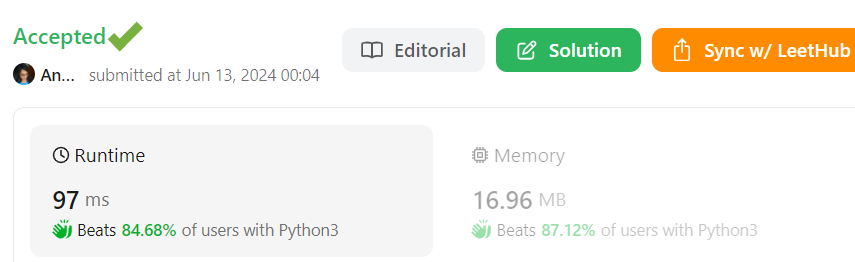

In [2]:
from typing import List
class Solution:
    def closedIsland(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid), len(grid[0])
        vis = [[0 for _ in range(cols)] for _ in range(rows)]
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        closed_islands = 0

        def dfs(x, y, grid, vis):
            vis[x][y] = 1

            for dx, dy in directions:
                if 0 < x + dx < rows - 1 and 0 < y + dy < cols - 1 and grid[x+dx][y+dy] ==0 and vis[x+dx][y+dy] == 0:
                    dfs(x+dx, y+dy, grid, vis)

        def dfs_convert(x, y, grid, vis):
            vis[x][y] = 1

            for dx, dy in directions:
                if 0 <= x + dx < rows  and 0 <= y + dy < cols  and grid[x+dx][y+dy] ==0 and vis[x+dx][y+dy] == 0:
                    dfs(x+dx, y+dy, grid, vis)


        # Convert border islands 
        for i in range(rows):
            if grid[i][0] == 0  :
                dfs_convert(i, 0, grid, vis)
            if grid[i][cols -1] == 0:
                dfs_convert(i, cols -1, grid, vis)

        for i in range(cols):
            if grid[0][i] == 0:
                dfs_convert(0, i, grid, vis)
            if grid[rows -1][i] == 0:
                dfs_convert(rows -1 , i, grid, vis)


        for i in range(1, rows -1):
            for j in range(1, cols - 1):
                if grid[i][j] == 0 and vis[i][j] == 0:
                    dfs(i, j, grid, vis)
                    closed_islands += 1

        return closed_islands